# Exploratory Data Analysis (EDA) on Retail Sales Data

**Objective:**
The goal of this project is to analyze retail sales data to identify patterns, trends, and insights
that can help a business make better decisions.


In [11]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)


In [12]:
# Loading the retail sales dataset
df = pd.read_csv(r"D:\Abutalha Folder\EDA\retail_sales_dataset.csv")

# Display first few rows
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


I first loaded the dataset and checked the first few rows to understand the structure of the data.


In [13]:
# Checking number of rows and columns
df.shape

# Checking data types and non-null values
df.info()

# Statistical summary
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


The dataset contains transaction details such as customer information, product category,
quantity, and total sales amount. All columns were checked for data types and completeness.


In [14]:
# Checking missing values
df.isnull().sum()

# Removing duplicate rows
df.drop_duplicates(inplace=True)


There were no missing values in the dataset. Duplicate records were removed to improve data quality.


In [15]:
# Calculating basic descriptive statistics
mean_sales = df['Total Amount'].mean()
median_sales = df['Total Amount'].median()
mode_sales = df['Total Amount'].mode()[0]
std_sales = df['Total Amount'].std()

mean_sales, median_sales, mode_sales, std_sales


(456.0, 135.0, 50, 559.997631555123)

Mean, median, mode, and standard deviation were calculated to understand the distribution
and variation of sales values.


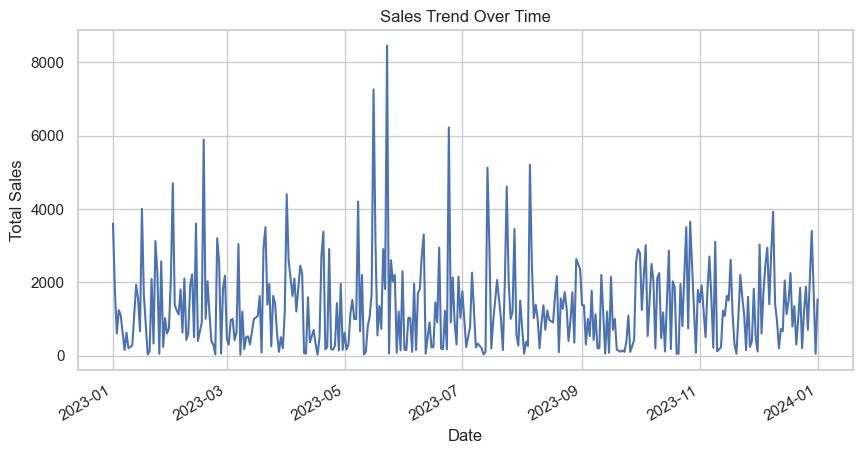

In [16]:
# Converting Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Grouping sales by date
daily_sales = df.groupby('Date')['Total Amount'].sum()

# Line plot for sales trend
plt.figure(figsize=(10,5))
daily_sales.plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


This line chart shows how total sales change over time.
It helps identify peak sales periods and overall sales trends.


In [17]:
# Gender-wise total sales
df.groupby('Gender')['Total Amount'].sum()

# Average spending by age
df.groupby('Age')['Total Amount'].mean()


Age
18    534.047619
19    708.095238
20    411.666667
21    629.250000
22    507.407407
23    342.500000
24    361.000000
25    495.000000
26    635.454545
27    408.043478
28    412.857143
29    410.625000
30    445.000000
31    464.545455
32    292.105263
33    624.000000
34    599.464286
35    513.181818
36    607.000000
37    728.125000
38    584.210526
39    255.277778
40    392.291667
41    269.047619
42    326.923077
43    579.677419
44    504.000000
45    372.058824
46    523.600000
47    480.961538
48    402.222222
49    268.947368
50    428.043478
51    535.500000
52    320.000000
53    559.411765
54    375.178571
55    465.714286
56    496.842105
57    309.666667
58    528.214286
59    557.058824
60    526.818182
61    373.888889
62    300.740741
63    544.117647
64    294.354839
Name: Total Amount, dtype: float64

Customer behavior was analyzed based on gender and age to understand purchasing patterns.


In [18]:
# Sales by product category
df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Quantity sold by product category
df.groupby('Product Category')['Quantity'].sum()


Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64

Product category analysis helped identify which products contribute the most to total sales.


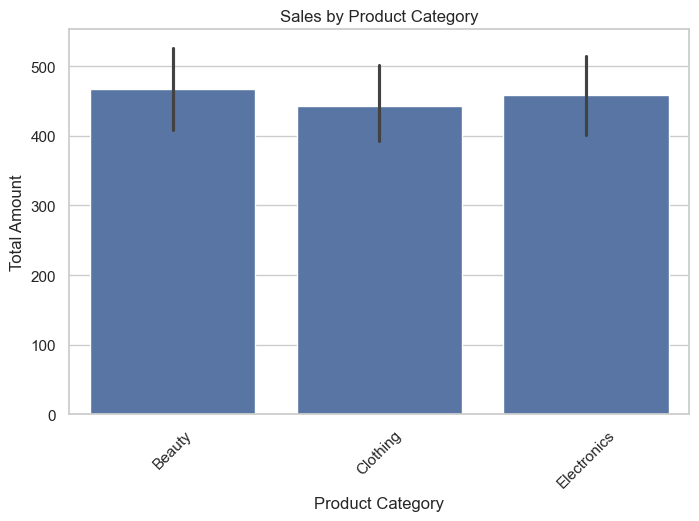

In [19]:
# Bar chart for sales by product category
plt.figure(figsize=(8,5))
sns.barplot(x='Product Category', y='Total Amount', data=df)
plt.title("Sales by Product Category")
plt.xticks(rotation=45)
plt.show()


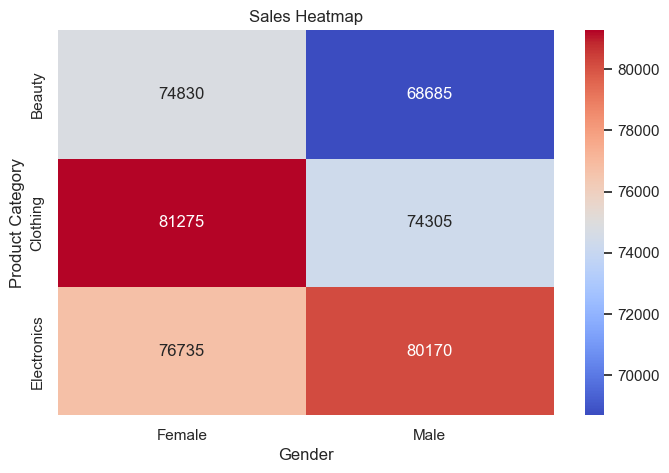

In [20]:
# Heatmap for gender vs product category
pivot = df.pivot_table(
    values='Total Amount',
    index='Product Category',
    columns='Gender',
    aggfunc='sum'
)

plt.figure(figsize=(8,5))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Sales Heatmap")
plt.show()


Bar charts and heatmaps were used to visually represent sales distribution
across product categories and customer groups.


## Insights
- Some product categories generate significantly higher sales.
- Sales show fluctuations over time with peak periods.
- Certain customer groups contribute more to total revenue.

## Recommendations
- Focus marketing efforts on high-performing product categories.
- Plan inventory based on sales trends.
- Target high-value customer segments with personalized offers.
